In [1]:
# import necessary libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#import urlib.requesst to open URLs
from urllib.request import urlopen 

#import Beautiful Soup package to extract data from html fles
from bs4 import BeautifulSoup
import re

#import necessary modules for data visualization
from pylab import rcParams
import seaborn as sns, numpy as np

In [2]:
from requests import get
url = 'http://www.imdb.com/search/title?release_date=2019&sort=num_votes,desc&page=1'
response = get(url)

In [3]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [4]:
mv_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')

In [5]:
headers = {"Accept-Language": "en-US, en;q=0.5"}

In [6]:
pages = [str(i) for i in range(1,10)]
years_url = [str(i) for i in range(2010,2019)]

In [7]:
from time import sleep
from random import randint

In [8]:
from time import time;start_time = time()
from datetime import timedelta
requests = 0
for _ in range(5):
# A request goes here
    requests += 1
    sleep(randint(1,3))
    elapsed_time = time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))

Request: 1; Frequency: 0.9980426076672861 requests/s
Request: 2; Frequency: 0.49964792503298877 requests/s
Request: 3; Frequency: 0.5980694053395619 requests/s
Request: 4; Frequency: 0.5700822046800167 requests/s
Request: 5; Frequency: 0.5537916663695897 requests/s


In [9]:
from IPython.core.display import clear_output
# start_time = time()requests = 0
for _ in range(10):
# A request would go here
    requests += 1
    sleep(randint(1,3))
    current_time = time()
    elapsed_time = current_time - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
clear_output(wait = True)

Request: 6; Frequency: 0.5429641102657656 requests/s
Request: 7; Frequency: 0.49815037876145796 requests/s
Request: 8; Frequency: 0.5314090641312242 requests/s
Request: 9; Frequency: 0.5605674421447556 requests/s
Request: 10; Frequency: 0.5247694759942247 requests/s
Request: 11; Frequency: 0.5484180449860865 requests/s
Request: 12; Frequency: 0.5439728885786002 requests/s
Request: 13; Frequency: 0.5635898865470212 requests/s
Request: 14; Frequency: 0.5370783678801024 requests/s
Request: 15; Frequency: 0.554134696831593 requests/s


In [10]:
from warnings import warn
warn("Warning Simulation")

C:\Users\gladies\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Warning Simulation
  


In [11]:
# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
grade_class = []
runing_time = []
moviegenre = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0

# For every year in the interval 2010-2019
for year_url in years_url:

    # For every page in the interval 1-4
    for page in pages:

        # Make a get request
        response = get('http://www.imdb.com/search/title?release_date=' + year_url +
        '&sort=num_votes,desc&page=' + page, headers = headers)

        # Pause the loop
        sleep(randint(8,15))

        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Break the loop if the number of requests is greater than expected
        if requests > 100:
            warn('Number of requests was greater than expected.')
            break

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the 50 movie containers from a single page
        imdb_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For every movie of these 50
        for container in imdb_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name = container.h3.a.text
                names.append(name)

                # Scrape the year
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))
                
                # Scrape the grade
                grade = container.find('span', class_ = 'certificate').text
                grade_class.append(grade) 
                
                # Scrape the runtime
                runtime = container.find('span', class_ = 'runtime').text
                runing_time.append(runtime) 
                
                # Scrape the genre
                genre = container.find('span', class_ = 'genre').text
                moviegenre.append(genre) 

Request:81; Frequency: 0.07714456617482478 requests/s


In [12]:
import pandas as pd 
imdb_ratings = pd.DataFrame({'imdb': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes,
'grade': grade_class,
'runtime': runing_time,
'genre': moviegenre                               
})
print(imdb_ratings.info())
imdb_ratings.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3690 entries, 0 to 3689
Data columns (total 8 columns):
movie        3690 non-null object
year         3690 non-null object
imdb         3690 non-null float64
metascore    3690 non-null int64
votes        3690 non-null int64
grade        3690 non-null object
runtime      3690 non-null object
genre        3690 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 230.8+ KB
None


,movie,year,imdb,metascore,votes,grade,runtime,genre
3680,Bad Times at the El Royale,(2018),7.1,60,103738,R,141 min,"\nCrime, Drama, Mystery"
3681,Ralph Breaks the Internet,(2018),7.1,71,103648,PG,112 min,"\nAnimation, Adventure, Comedy"
3682,The Predator,(2018),5.4,48,102950,R,107 min,"\nAction, Adventure, Sci-Fi"
3683,The Nun,(2018),5.3,46,100137,R,96 min,"\nHorror, Mystery, Thriller"
3684,A Simple Favor,(2018),6.8,67,98625,R,117 min,"\nComedy, Crime, Drama"
3685,Halloween,(I) (2018),6.6,67,98280,R,106 min,"\nHorror, Thriller"
3686,The Ballad of Buster Scruggs,(2018),7.3,79,96276,R,133 min,"\nComedy, Drama, Musical"
3687,Maze Runner: The Death Cure,(2018),6.2,50,96176,PG-13,143 min,"\nAction, Sci-Fi, Thriller"
3688,Pacific Rim: Uprising,(2018),5.6,44,93515,PG-13,111 min,"\nAction, Adventure, Sci-Fi"
3689,Tag,(I) (2018),6.5,56,93443,R,100 min,\nComedy


In [13]:
imdb_ratings = imdb_ratings[['movie', 'year', 'imdb', 'metascore', 'votes', 'grade', 'runtime', 'genre']]
imdb_ratings.head()

,movie,year,imdb,metascore,votes,grade,runtime,genre
0,Inception,(2010),8.8,74,1884197,PG-13,148 min,"\nAction, Adventure, Sci-Fi"
1,Shutter Island,(2010),8.1,63,1031318,R,138 min,"\nMystery, Thriller"
2,Toy Story 3,(2010),8.3,92,704022,G,103 min,"\nAnimation, Adventure, Comedy"
3,Iron Man 2,(2010),7.0,57,674316,PG-13,124 min,"\nAction, Adventure, Sci-Fi"
4,Black Swan,(2010),8.0,79,659587,R,108 min,"\nDrama, Thriller"


In [14]:
imdb_ratings['year'].unique()

array(['(2010)', '(I) (2010)', '(2011)', '(I) (2011)', '(2012)',
       '(I) (2012)', '(2013)', '(I) (2013)', '(2014)', '(I) (2014)',
       '(II) (2014)', '(2015)', '(I) (2015)', '(II) (2015)', '(2016)',
       '(II) (2016)', '(I) (2016)', '(IX) (2016)', '(2017)', '(I) (2017)',
       '(2018)', '(I) (2018)', '(III) (2018)'], dtype=object)

In [16]:
imdb_ratings.loc[:, 'year'] = imdb_ratings['year'].str[-5:-1].astype(int)

In [17]:
imdb_ratings['year'].tail(3)

3687    2018
3688    2018
3689    2018
Name: year, dtype: int32

In [18]:
imdb_ratings.describe().loc[['min', 'max'], ['imdb', 'metascore']]

,imdb,metascore
min,4.1,27.0
max,8.8,100.0


In [19]:
imdb_ratings['n_imdb'] = movie_ratings['imdb'] * 10
imdb_ratings.head(3)

NameError: name 'movie_ratings' is not defined

In [20]:
imdb_ratings.to_csv('movie_ratings_2019.csv')

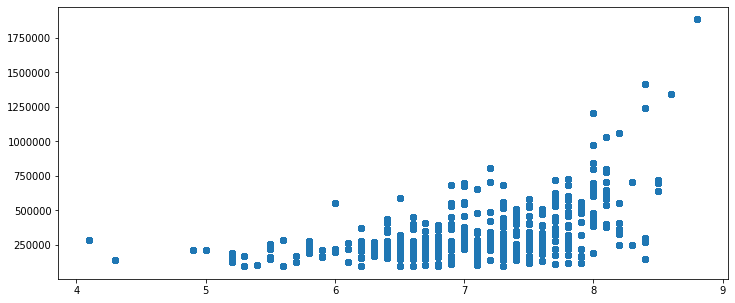

In [25]:
#Start to make charts and do statistical analysis
import seaborn as sns, numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,5)
plt.scatter(imdb_ratings.imdb, imdb_ratings.votes)
plt.show()

In [26]:
df = imdb_ratings
print(df['runtime'])

0       148 min
1       138 min
2       103 min
3       124 min
4       108 min
         ...   
3685    106 min
3686    133 min
3687    143 min
3688    111 min
3689    100 min
Name: runtime, Length: 3690, dtype: object


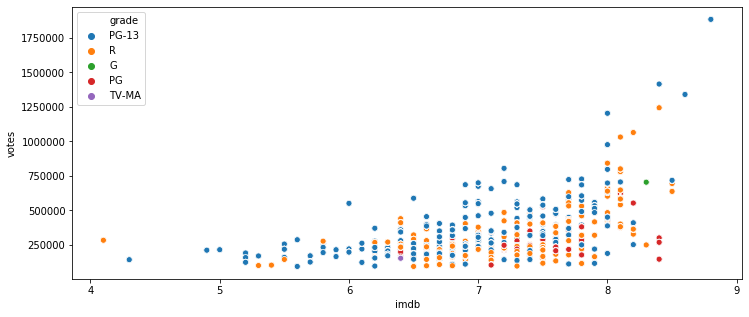

In [27]:
ax = sns.scatterplot(x="imdb", y="votes", hue="grade",data=df)

In [28]:
#Need to change format of Volume from string to numeric 
runtime_num_list = df['runtime'].tolist()
runtime_num = []
for i in runtime_num_list:
    if i.endswith('min'):
        num = i.strip("min")
        runtime_num.append(num)
#pass num back to Volume_list
df['runtime'] = runtime_num
df.head(5)
df['runtime'] = pd.to_numeric(df['runtime'])

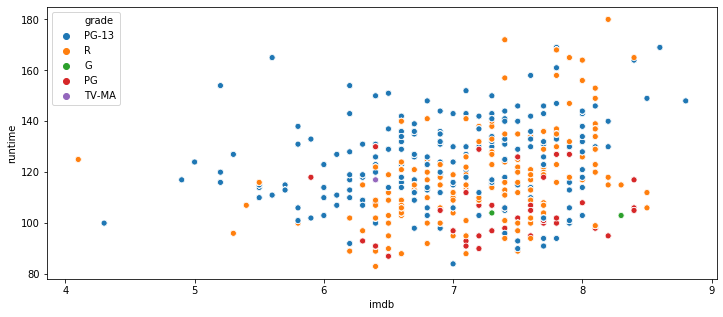

In [29]:
ax = sns.scatterplot(x="imdb", y="runtime", hue="grade",data=df)
yticks=np.arange(120,170,5)

In [30]:
df = movie_ratings
df.describe()

NameError: name 'movie_ratings' is not defined

Text(0.5, 1.0, 'imdb rating by grade')

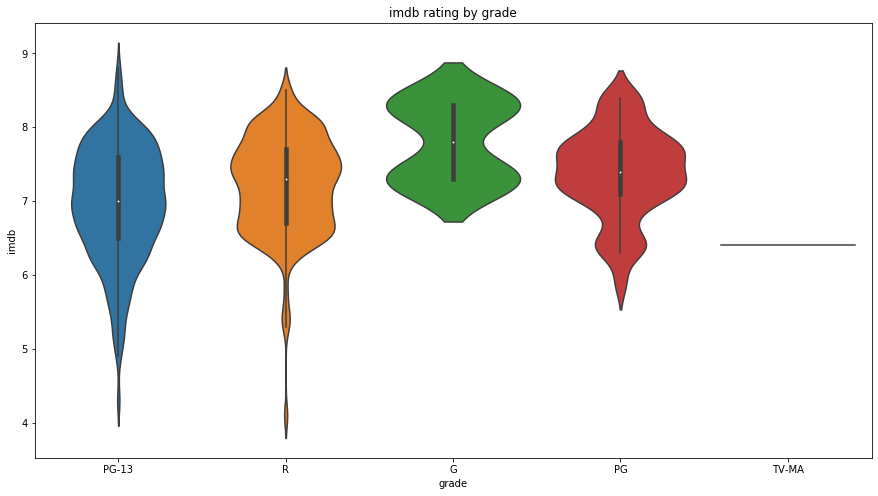

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 8))
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=df, x='grade', y='imdb')
viz_2.set_title('imdb rating by grade')

In [32]:
df = movie_ratings
plt.figure(figsize=(15, 6))
sns.barplot(x='grade', y='imdb', hue='grade',data=df)

NameError: name 'movie_ratings' is not defined

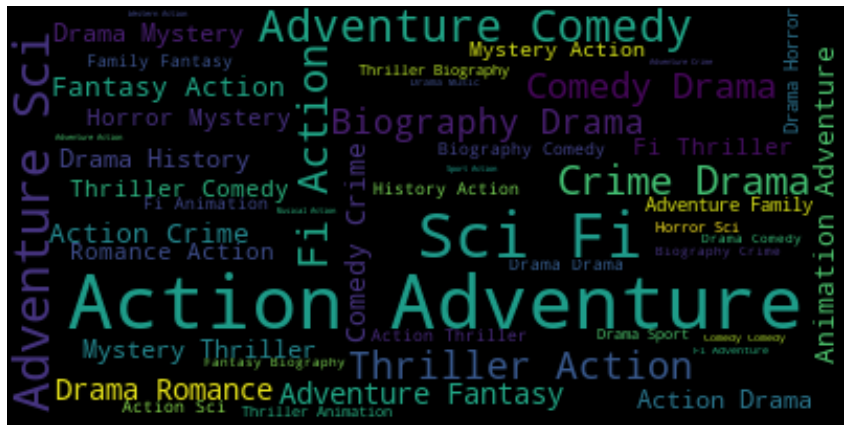

In [33]:
#word cloud
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.genre)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=400).generate(text)
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
import sys
print(sys.executable)

C:\Users\gladies\Anaconda3\python.exe
